# **03-03 N-gram 언어 모델 (N-gram Language Model)**

---



카운트에 기반한 통계적 접근을 사용, SLM의 일종

다만, 이전에 등장한 모든 단어를 고려하는 것이 아닌 일부 단어만 고려하는 접근 방법 사용. 이때 일부 단어를 몇 개 보느냐를 결정하는 것이 n-gram에서의 n임

## **1. 코퍼스에서 카운트하지 못하는 경우의 감소**

---



SLM의 한계: 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있음, 확률을 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성 높음

그러나 다음과 같이 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성 높일 수 있음

>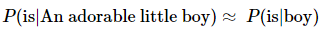

> 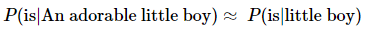

갖고있는 코퍼스에 An adorable little boy is가 있을 가능성 보다는 boy is라는 더 짧은 단어 시퀀스가 존재할 가능성이 더 높음. 조금 지나친 일반화로 느껴진다면 little boy가 나왔을 때 is가 나올 확률로 생각하는 것도 대안임

## **2. N-gram**

---



n개의 연속적인 단어 나열을 의미. 갖고있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주함

문장 An adorable little boy is spreading smiles을 각 n에 대해서 n-gram을 전부 구해보면 다음과 같음

> 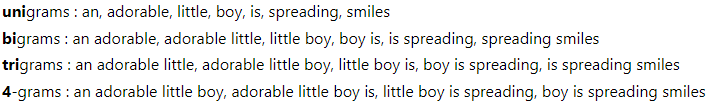

n = 1일 땐 유니그램(unigram), 2일 땐 바이그램(bigram), 3일 땐 트라이그램(trigram), 4 이상일 땐 gram 앞에 그대로 숫자 붙여서 명명

n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존함. 예를 들어 **'An adorable little boy is spreading'** 다음에 나올 단어를 예측할 때 n=4인 4-gram을 이용한다면, spreading 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려함

> 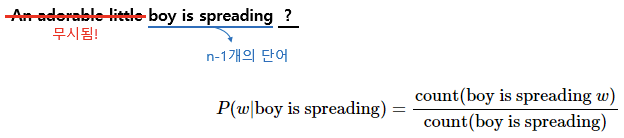

갖고있는 코퍼스에서 boy is spreading가 1,000번, boy is spreading insults가 500번, boy is spreading smiles가 200번 등장했다고 가정함. 그러면 boy is spreading 다음에 insults가 등장할 확률은 50%, smiles가 등장할 확률은 20% 이므로 확률적 선택에 따라 우리는 insults가 더 맞다고 판단

> 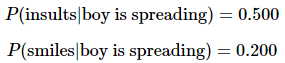

## **3. N-gram Language Model의 한계**

---



앞서 본 4-gram 언어 모델은 **'작고 사랑스러운(an adorable little)'**이라는 수식어를 반영하지 않음. 그런데 **'작고 사랑스러운'** 까지 고려하여 **작고 사랑스러운 소년**이 하는 행동에 대해 다음 단어를 예측하는 모델이었다면 과연 **'모욕을 퍼트렸다'**라는 부정적인 내용이 **'웃음 지었다'**라는 긍정적인 내용 대신 선택되었을까?

n-gram은 앞의 단어 몇 개만 보다보니 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우 발생함. 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없음

### **(1) 희소 문제 (Sparsity Problem)**

문장에 존재하는 단어들을 모두 보는 것보다 일부 단어만을 보는 것이 현실적으로 코퍼스에서 카운트할 수 있는 확률을 높일 수는 있지만, n-gram 언어 모델도 여전히 희소 문제가 존재함

### **(2) n을 선택하는 것은 trade-off 문제**

n을 크게 선택하면 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각해짐. 또한 n이 커질수록 코퍼스의 모든 n-gram에 대해서 카운트 해야 하기 때문에 모델 사이즈가 커짐

n을 작게 선택하면 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어짐.

따라서 적절한 n을 선택해야 함. trade-off 문제로 인해 정확도를 높이려면 **n은 최대 5를 넘게 잡아서는 안 된다고 권장**함

## **4. 적용 분야(Domain)에 맞는 코퍼스의 수집**

---



어떤 분야인지, 어떤 어플리케이션인지에 따라 특정 단어들의 확률분포는 당연히 다름. 이 경우 언어 모델에 사용하는 코퍼스를 해당 도메인의 코퍼스를 사용한다면 언어 모델이 제대로 된 언어 생성을 할 가능성 높아짐

훈련에 사용된 도메인 코퍼스가 무엇이냐에 따라 성능이 비약적으로 달라지기 때문에, 이를 언어 모델의 약점이라고 하는 경우도 있음

## **5. 인공 신경망을 이용한 언어 모델 (Neural Network Based Language Model)**

---



(여기서 다루진 않음) N-gram 언어 모델의 한계점을 극복하기 위해 여러 일반화 방법들이 존재하지만 본질적으로 n-gram에 대한 취약점을 완전히 해결하지는 못함. 이를 위한 대안으로 보다 성능이 우수한 **인공 신경망을 이용한 언어 모델**이 많이 사용되고 있음